# Data Exploration

In [ ]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
diabetes_data = pd.read_csv('../content/diabetes_klasifikasi.csv')

In [ ]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
diabetes_data.shape

(768, 9)

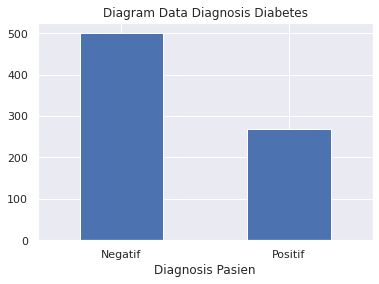

In [ ]:
d=diabetes_data.copy()
for i in range(len(d)):
  if d['Outcome'][i]==0:
    d['Outcome'][i]='Negatif'
  else:
    d['Outcome'][i]='Positif'
d['Outcome'].value_counts().plot.bar(rot=0, title='Diagram Data Diagnosis Diabetes',xlabel='Diagnosis Pasien')

# Data Preprocessing

In [ ]:
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
diabetes_data.duplicated().sum()

0

In [ ]:
numerical_columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness',
                     'Insulin','BMI','DiabetesPedigreeFunction','Age']

In [ ]:
nul = []
for i in range(len(numerical_columns)):
  bnyk = diabetes_data.loc[diabetes_data[numerical_columns[i]] == 0]
  nul.append(len(bnyk))
data = {'Fitur': numerical_columns,  
        'Jumlah Null': nul}  #buat kerangka data frame Y 

dataxy = pd.DataFrame(data) #bentuk data frame X dan Y
dataxy.style.hide_index()

Fitur,Jumlah Null
Pregnancies,111
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0


In [ ]:
ganti_0 = ['Glucose','BloodPressure','SkinThickness',
                     'Insulin','BMI']

In [ ]:
for i in range(len(ganti_0)):
  mean_df = np.mean(diabetes_data[ganti_0[i]])
  if i != 4:
    mean_df = np.ceil(mean_df)
    diabetes_data[ganti_0[i]] = diabetes_data[ganti_0[i]].replace(0,mean_df)
  else:
    mean_df = float(np.ceil(mean_df))
    diabetes_data[ganti_0[i]] = diabetes_data[ganti_0[i]].replace(0.0,mean_df)

In [ ]:
diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,80,33.6,0.627,50,1
1,1,85,66,29,80,26.6,0.351,31,0
2,8,183,64,21,80,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,80,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,21,80,30.1,0.349,47,1


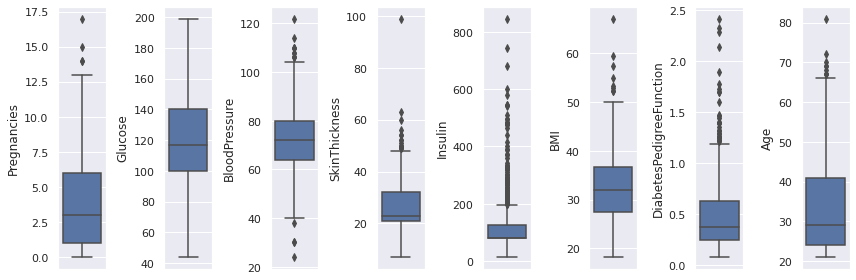

In [ ]:
plt.figure(figsize=(12,4))
for i in range(0,len(numerical_columns)):
    plt.subplot(1,len(numerical_columns),i+1)
    sns.boxplot(y=diabetes_data[numerical_columns[i]])
    plt.tight_layout()

In [ ]:
for i in range(len(numerical_columns)):
  Q1 = np.quantile(diabetes_data[numerical_columns[i]], .25)
  Q3 = np.quantile(diabetes_data[numerical_columns[i]], .75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  
  #cek data outlier
  outmax=diabetes_data.loc[diabetes_data[numerical_columns[i]] > upper_bound]
  outmin=diabetes_data.loc[diabetes_data[numerical_columns[i]] < lower_bound]
  if len(outmax)!=0:
    for j in range(len(outmax.index)):
      diabetes_data[numerical_columns[i]][outmax.index[j]] = upper_bound
  if len(outmin)!=0:
    for j in range(len(outmin.index)):
      diabetes_data[numerical_columns[i]][outmin.index[j]] = lower_bound

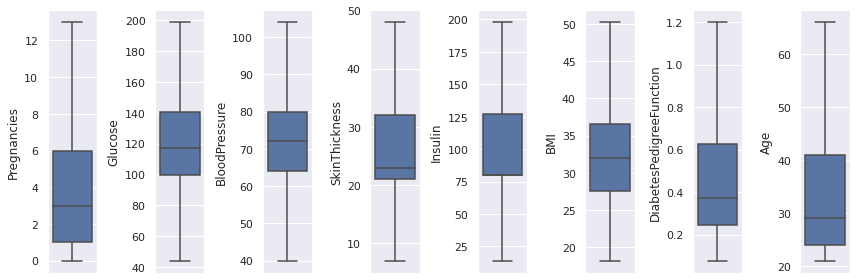

In [ ]:
plt.figure(figsize=(12,4))
for i in range(0,len(numerical_columns)):
    plt.subplot(1,len(numerical_columns),i+1)
    sns.boxplot(y=diabetes_data[numerical_columns[i]])
    plt.tight_layout()

In [ ]:
diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,80,33.6,0.627,50,1
1,1,85,66,29,80,26.6,0.351,31,0
2,8,183,64,21,80,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,1.200,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,80,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,21,80,30.1,0.349,47,1


In [ ]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.834635,121.682292,72.266927,26.589844,103.944010,32.389063,0.458914,33.194010,0.348958
std,3.336808,30.435999,11.707333,8.969585,46.629117,6.667627,0.285596,11.611715,0.476951
min,0.000000,44.000000,40.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,21.000000,80.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,80.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,13.000000,199.000000,104.000000,48.000000,198.000000,50.250000,1.200000,66.000000,1.000000


#Algoritma PSO

In [ ]:
import random
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from scipy.spatial import distance as dist

## Men-generate data latih PSO

In [ ]:
def datalatihPSO(dataset,num):
  idx = random.sample(range(0,len(dataset)),num)
  datalatih = []
  for i in range(num):
    datalatih.append(dataset.loc[idx[i]].values.tolist())
  return datalatih

## Fitness Function

In [ ]:
# Fitness function
# data latih 
# banyak kelas: 2
# banyak atribut: 6

def fitness(particle,datalatihPSO):
  cost = 0
  yk = len(datalatihPSO)
  dl = len(datalatihPSO[0])-1
  for i in range(yk):
    if dist.minkowski(datalatihPSO[i][0:dl],particle[0:dl], 2) <= dist.minkowski(datalatihPSO[i][0:dl],particle[dl:2*dl], 2):
      if int(datalatihPSO[i][-1]) != 0:
        cost = cost + 1
    else:
      if int(datalatihPSO[i][-1]) != 1:
        cost = cost + 1
  acc = (yk-cost)/yk
  return acc

##Update Velocity (Kecepatan)

In [ ]:
def update_velocity(particle, velocity, pbest, gbest, w, c1, c2):
  # Initialise new velocity array
  num_particle = len(particle)
  new_velocity = np.array([0.0 for i in range(num_particle)])
  # Randomly generate r1, r2 and inertia weight from normal distribution
  r1 = 0.5
  r2 = 0.5
  # Calculate new velocity
  for i in range(num_particle):
    new_velocity[i] = w*velocity[i] + c1*r1*(pbest[i]-particle[i])+c2*r2*(gbest[i]-particle[i])
  return new_velocity

##Update Position (Posisi)

In [ ]:
def update_position(particle, velocity):
  # Move particles by adding velocity
  new_particle = particle + velocity
  return new_particle

## Men-generate partikel

In [ ]:
def get_particle(num_particle,dataset):
  lastcol = dataset.columns[-1]
  dataset = dataset.drop(lastcol, axis = 'columns')
  part = []
  for i in range(num_particle):
    idx = random.sample(range(0,len(dataset)),2)
    ptc = []
    for j in range(2):
      ptc = ptc + dataset.loc[idx[j]].values.tolist()
    part.append(ptc)
  return part

## Algoritma Utama

In [ ]:
def PSO(num_part, dim, iter, dataset, num_tr, fitness_criterion, wmin, wmax, c1, c2):
  # Initialisation
  dlatih = datalatihPSO(dataset,num_tr)
  # Population
  particles = get_particle(num_part,dataset)
  # Particle's best position
  pbest_position = particles
  # Fitness
  pbest_fitness = [fitness(p,dlatih) for p in particles]
  # Index of the best particle
  gbest_index = np.argmax(pbest_fitness)
  # Global best particle position
  gbest_position = pbest_position[gbest_index]
  # Velocity (starting from 0 speed)
  velocity = [[0.0 for j in range(dim)] for i in range(num_part)]
  
  # Loop for the number of generation
  for t in range(iter):
    # Stop if the average fitness value reached a predefined success criterion
    if np.average(pbest_fitness) >= fitness_criterion:
      break
    else:
      w = wmax - ((wmax - wmin)/(iter))*t
      for n in range(num_part):
        # Update the velocity of each particle
        velocity[n] = update_velocity(particles[n], velocity[n], pbest_position[n], gbest_position, w ,c1, c2)
        # Move the particles to new position
        particles[n] = update_position(particles[n], velocity[n])
    # Calculate the fitness value
    pbest_fitness = [fitness(p,dlatih) for p in particles]
    # Find the index of the best particle
    gbest_index = np.argmax(pbest_fitness)
    # Update the position of the best particle
    gbest_position = pbest_position[gbest_index]

  # Print the results
  return gbest_position.tolist(), max(pbest_fitness)

## Coba-coba

In [ ]:
# PSO(num_part, dim, iter, dataset, num_tr, fitness_criterion, wmin, wmax, c1, c2)
salin = diabetes_data.copy()
a = PSO(20, 16, 100, salin, 20, 0.9, 0.5, 0.6, 1.5, 1.5)
a

([3.1323847103518574,
  91.05297551019757,
  34.670696744374204,
  22.61995827163706,
  87.12463457590853,
  26.13213032053955,
  0.8721764966496548,
  25.254950728122427,
  -5.711563829074178,
  99.38094981501311,
  75.02626393127167,
  31.246659158287343,
  122.439384629355,
  19.360423158000156,
  -0.11241314820837617,
  35.87920801281211],
 0.9)

# Algoritma LVQ

## Pelatihan Klasifikasi dengan LVQ

In [ ]:
def LVQtr(dtratr, dtrlabel,itmax, lrate, declrate, minlrate, bwl):
  it = 0
  dtratr.reset_index(drop=True, inplace = True)
  dtrlabel.reset_index(drop=True, inplace = True)
  b0, b1 = bwl[0:int(len(bwl)/2)], bwl[int(len(bwl)/2):len(bwl)]
  while it <= itmax and lrate > minlrate:
    for i in range(len(dtratr)):
      dtlist = dtratr.loc[i].values.tolist()
      if dist.minkowski(dtlist,b0, 2) <= dist.minkowski(dtlist,b1, 2):
        kls = 0
        if kls == dtrlabel[i]:
          for j in range(len(b0)):
            b0[j] = b0[j] + lrate*(dtlist[j]-b0[j])
        else:
          for j in range(len(b0)):
            b0[j] = b0[j] - lrate*(dtlist[j]-b0[j])
      else:
        kls = 1
        if kls == dtrlabel[i]:
          for j in range(len(b1)):
            b1[j] = b1[j] + lrate*(dtlist[j]-b1[j])
        else:
          for j in range(len(b1)):
            b1[j] = b1[j] - lrate*(dtlist[j]-b1[j])
    lrate = lrate - declrate*lrate
    it += 1
  return b0, b1

## Pengujian Klasifikasi dengan LVQ

In [ ]:
def LVQts2(dtsatr, dtslabel,bts):
  dtsatr.reset_index(drop=True, inplace = True)
  dtslabel.reset_index(drop=True, inplace = True)
  bobot0, bobot1 = bts[0], bts[1]
  klspred = []
  cost = 0
  for i in range(len(dtsatr)):
    dtslist = dtsatr.loc[i].values.tolist()
    if dist.minkowski(dtslist,bobot0, 2) <= dist.minkowski(dtslist,bobot1, 2):
      kls = 0
    else:
      kls = 1
    klspred.append(kls)
  return klspred

In [ ]:
def confmatrix(dtslabellist, pred):
  banding = {'Benar': klsbenar, 'Prediksi': pred}
  bandingdf = pd.DataFrame(banding)
  confmix = pd.crosstab(bandingdf['Benar'], bandingdf['Prediksi'], rownames=['True'], colnames=['Pred'])
  lst = confmix.values.tolist()
  TN = lst[0][0]
  FP = lst[0][1]
  FN = lst[1][0]
  TP = lst[1][1]
  acc = (TN+TP)/(TN+FP+FN+TP)
  pres = (TP)/(TP+FP)
  rec = (TP)/(TP+FN)
  return [acc, pres, rec]

# 5-Cross Validation

In [ ]:
from sklearn.model_selection import train_test_split

## Random State = 101

### Bobot Awal

In [ ]:
bawal = []
fness = []
salin2 = diabetes_data.copy()

for i in range(50):
  a = PSO(20, 16, 100, salin2, 20, 0.8, 0.5, 0.6, 1.5, 1.5)
  ind = 0
  for j in range(len(a[0])):
    if a[0][j] < 0:
      ind = 1
      break
  if ind == 1:
    continue
  else:
    bawal.append(a[0])
    fness.append(a[1])

### Splitting data

In [ ]:
X = diabetes_data.drop('Outcome', axis=1) # Independent Values
Y = diabetes_data['Outcome'] # Targeted Values Selection

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

### LVQ

In [ ]:
eval = []
for i in range(len(bawal)):
  xtr = X_train.copy()
  ytr = Y_train.copy()
  xts = X_test.copy()
  yts = Y_test.copy()
  bbt = LVQtr(xtr, ytr, 50, 0.1, 0.9, 10e-16, bawal[i])
  evmod = LVQts2(xts, yts, bbt)
  if (1 in evmod) == False or (0 in evmod) == False:
    continue
  else:
    klsbenar = yts.values.tolist()
    ev = confmatrix(klsbenar, evmod)
    eval.append(ev)
dframe = pd.DataFrame(eval, columns = ['Akurasi','Presisi','Recall'])
dframe.loc[dframe.idxmax()[0]]

Akurasi    0.792208
Presisi    0.743590
Recall     0.568627
Name: 2, dtype: float64

In [ ]:
eval2 = []
for i in range(25):
  xtr = X_train.copy()
  ytr = Y_train.copy()
  xts = X_test.copy()
  yts = Y_test.copy()
  idx = random.sample(range(0,len(salin2)),2)
  botwl = []
  for j in range(2):
    botwl = botwl + salin2.loc[idx[j]].values.tolist()
    botwl.pop(-1)
  bbt = LVQtr(xtr, ytr, 50, 0.1, 0.9, 10e-16, botwl)
  evmod = LVQts2(xts, yts, bbt)
  if (1 in evmod) == False or (0 in evmod) == False:
    continue
  else:
    klsbenar = yts.values.tolist()
    ev = confmatrix(klsbenar, evmod)
    eval2.append(ev)
dframe2 = pd.DataFrame(eval2, columns = ['Akurasi','Presisi','Recall'])
dframe2.loc[dframe2.idxmax()[0]]

Akurasi    0.785714
Presisi    0.725000
Recall     0.568627
Name: 0, dtype: float64

## Random State = 27

### Bobot Awal

In [ ]:
bawal = []
fness = []
salin2 = diabetes_data.copy()

for i in range(50):
  a = PSO(20, 16, 100, salin2, 20, 0.8, 0.5, 0.6, 1.5, 1.5)
  ind = 0
  for j in range(len(a[0])):
    if a[0][j] < 0:
      ind = 1
      break
  if ind == 1:
    continue
  else:
    bawal.append(a[0])
    fness.append(a[1])

### Splitting data

In [ ]:
X = diabetes_data.drop('Outcome', axis=1) # Independent Values
Y = diabetes_data['Outcome'] # Targeted Values Selection

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=27)

### LVQ

In [ ]:
eval = []
for i in range(len(bawal)):
  xtr = X_train.copy()
  ytr = Y_train.copy()
  xts = X_test.copy()
  yts = Y_test.copy()
  bbt = LVQtr(xtr, ytr, 50, 0.1, 0.9, 10e-16, bawal[i])
  evmod = LVQts2(xts, yts, bbt)
  if (1 in evmod) == False or (0 in evmod) == False:
    continue
  else:
    klsbenar = yts.values.tolist()
    ev = confmatrix(klsbenar, evmod)
    eval.append(ev)
dframe = pd.DataFrame(eval, columns = ['Akurasi','Presisi','Recall'])
dframe.loc[dframe.idxmax()[0]]

Akurasi    0.746753
Presisi    0.608696
Recall     0.571429
Name: 3, dtype: float64

In [ ]:
eval2 = []
for i in range(25):
  xtr = X_train.copy()
  ytr = Y_train.copy()
  xts = X_test.copy()
  yts = Y_test.copy()
  idx = random.sample(range(0,len(salin2)),2)
  botwl = []
  for j in range(2):
    botwl = botwl + salin2.loc[idx[j]].values.tolist()
    botwl.pop(-1)
  bbt = LVQtr(xtr, ytr, 50, 0.1, 0.9, 10e-16, botwl)
  evmod = LVQts2(xts, yts, bbt)
  if (1 in evmod) == False or (0 in evmod) == False:
    continue
  else:
    klsbenar = yts.values.tolist()
    ev = confmatrix(klsbenar, evmod)
    eval2.append(ev)
dframe2 = pd.DataFrame(eval2, columns = ['Akurasi','Presisi','Recall'])
dframe2.loc[dframe2.idxmax()[0]]

Akurasi    0.746753
Presisi    0.608696
Recall     0.571429
Name: 3, dtype: float64

## Random State = 56

### Bobot Awal

In [ ]:
bawal = []
fness = []
salin2 = diabetes_data.copy()

for i in range(50):
  a = PSO(20, 16, 100, salin2, 20, 0.8, 0.5, 0.6, 1.5, 1.5)
  ind = 0
  for j in range(len(a[0])):
    if a[0][j] < 0:
      ind = 1
      break
  if ind == 1:
    continue
  else:
    bawal.append(a[0])
    fness.append(a[1])

### Splitting data

In [ ]:
X = diabetes_data.drop('Outcome', axis=1) # Independent Values
Y = diabetes_data['Outcome'] # Targeted Values Selection

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=56)

### LVQ

In [ ]:
eval = []
for i in range(len(bawal)):
  xtr = X_train.copy()
  ytr = Y_train.copy()
  xts = X_test.copy()
  yts = Y_test.copy()
  bbt = LVQtr(xtr, ytr, 50, 0.1, 0.9, 10e-16, bawal[i])
  evmod = LVQts2(xts, yts, bbt)
  if (1 in evmod) == False or (0 in evmod) == False:
    continue
  else:
    klsbenar = yts.values.tolist()
    ev = confmatrix(klsbenar, evmod)
    eval.append(ev)
dframe = pd.DataFrame(eval, columns = ['Akurasi','Presisi','Recall'])
dframe.loc[dframe.idxmax()[0]]

Akurasi    0.74026
Presisi    0.50000
Recall     0.57500
Name: 0, dtype: float64

In [ ]:
eval2 = []
for i in range(25):
  xtr = X_train.copy()
  ytr = Y_train.copy()
  xts = X_test.copy()
  yts = Y_test.copy()
  idx = random.sample(range(0,len(salin2)),2)
  botwl = []
  for j in range(2):
    botwl = botwl + salin2.loc[idx[j]].values.tolist()
    botwl.pop(-1)
  bbt = LVQtr(xtr, ytr, 50, 0.1, 0.9, 10e-16, botwl)
  evmod = LVQts2(xts, yts, bbt)
  if (1 in evmod) == False or (0 in evmod) == False:
    continue
  else:
    klsbenar = yts.values.tolist()
    ev = confmatrix(klsbenar, evmod)
    eval2.append(ev)
dframe2 = pd.DataFrame(eval2, columns = ['Akurasi','Presisi','Recall'])
dframe2.loc[dframe2.idxmax()[0]]

Akurasi    0.746753
Presisi    0.510638
Recall     0.600000
Name: 3, dtype: float64

## Random State = 72

### Bobot Awal

In [ ]:
bawal = []
fness = []
salin2 = diabetes_data.copy()

for i in range(50):
  a = PSO(20, 16, 100, salin2, 20, 0.8, 0.5, 0.6, 1.5, 1.5)
  ind = 0
  for j in range(len(a[0])):
    if a[0][j] < 0:
      ind = 1
      break
  if ind == 1:
    continue
  else:
    bawal.append(a[0])
    fness.append(a[1])

### Splitting data

In [ ]:
X = diabetes_data.drop('Outcome', axis=1) # Independent Values
Y = diabetes_data['Outcome'] # Targeted Values Selection

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=72)

### LVQ

In [ ]:
eval = []
for i in range(len(bawal)):
  xtr = X_train.copy()
  ytr = Y_train.copy()
  xts = X_test.copy()
  yts = Y_test.copy()
  bbt = LVQtr(xtr, ytr, 50, 0.1, 0.9, 10e-16, bawal[i])
  evmod = LVQts2(xts, yts, bbt)
  if (1 in evmod) == False or (0 in evmod) == False:
    continue
  else:
    klsbenar = yts.values.tolist()
    ev = confmatrix(klsbenar, evmod)
    eval.append(ev)
dframe = pd.DataFrame(eval, columns = ['Akurasi','Presisi','Recall'])
dframe.loc[dframe.idxmax()[0]]

Akurasi    0.753247
Presisi    0.729730
Recall     0.490909
Name: 2, dtype: float64

In [ ]:
eval2 = []
for i in range(25):
  xtr = X_train.copy()
  ytr = Y_train.copy()
  xts = X_test.copy()
  yts = Y_test.copy()
  idx = random.sample(range(0,len(salin2)),2)
  botwl = []
  for j in range(2):
    botwl = botwl + salin2.loc[idx[j]].values.tolist()
    botwl.pop(-1)
  bbt = LVQtr(xtr, ytr, 50, 0.1, 0.9, 10e-16, botwl)
  evmod = LVQts2(xts, yts, bbt)
  if (1 in evmod) == False or (0 in evmod) == False:
    continue
  else:
    klsbenar = yts.values.tolist()
    ev = confmatrix(klsbenar, evmod)
    eval2.append(ev)
dframe2 = pd.DataFrame(eval2, columns = ['Akurasi','Presisi','Recall'])
dframe2.loc[dframe2.idxmax()[0]]

Akurasi    0.753247
Presisi    0.729730
Recall     0.490909
Name: 3, dtype: float64

## Random State = 7

### Bobot Awal

In [ ]:
bawal = []
fness = []
salin2 = diabetes_data.copy()

for i in range(50):
  a = PSO(20, 16, 100, salin2, 20, 0.8, 0.5, 0.6, 1.5, 1.5)
  ind = 0
  for j in range(len(a[0])):
    if a[0][j] < 0:
      ind = 1
      break
  if ind == 1:
    continue
  else:
    bawal.append(a[0])
    fness.append(a[1])

### Splitting data

In [ ]:
X = diabetes_data.drop('Outcome', axis=1) # Independent Values
Y = diabetes_data['Outcome'] # Targeted Values Selection

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

### LVQ

In [ ]:
eval = []
for i in range(len(bawal)):
  xtr = X_train.copy()
  ytr = Y_train.copy()
  xts = X_test.copy()
  yts = Y_test.copy()
  bbt = LVQtr(xtr, ytr, 50, 0.1, 0.9, 10e-16, bawal[i])
  evmod = LVQts2(xts, yts, bbt)
  if (1 in evmod) == False or (0 in evmod) == False:
    continue
  else:
    klsbenar = yts.values.tolist()
    ev = confmatrix(klsbenar, evmod)
    eval.append(ev)
dframe = pd.DataFrame(eval, columns = ['Akurasi','Presisi','Recall'])
dframe.loc[dframe.idxmax()[0]]

Akurasi    0.727273
Presisi    0.659574
Recall     0.543860
Name: 1, dtype: float64

In [ ]:
eval2 = []
for i in range(25):
  xtr = X_train.copy()
  ytr = Y_train.copy()
  xts = X_test.copy()
  yts = Y_test.copy()
  idx = random.sample(range(0,len(salin2)),2)
  botwl = []
  for j in range(2):
    botwl = botwl + salin2.loc[idx[j]].values.tolist()
    botwl.pop(-1)
  bbt = LVQtr(xtr, ytr, 50, 0.1, 0.9, 10e-16, botwl)
  evmod = LVQts2(xts, yts, bbt)
  if (1 in evmod) == False or (0 in evmod) == False:
    continue
  else:
    klsbenar = yts.values.tolist()
    ev = confmatrix(klsbenar, evmod)
    eval2.append(ev)
dframe2 = pd.DataFrame(eval2, columns = ['Akurasi','Presisi','Recall'])
dframe2.loc[dframe2.idxmax()[0]]

Akurasi    0.753247
Presisi    0.711111
Recall     0.561404
Name: 20, dtype: float64